
Experiment No.08

---
Aim: To implement Classification using KNN.

---

**Objectives**


1. Understand k nearest neighbor (KNN) and learn about KNN algorithm
2.   To find the accurate value of k for which the error in the classificatio is the minimum.
3.   To compare the results obtained.
 
---

**Theory**

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). 

KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970's as a non-parametric technique Algorithm.


KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.


 ---

 
**Dataset**

To implement the KNN classification algorithm I have used the Pima Indians Diabetes Dataset that finds whether a human is suffering from diabetes or not.


The classification is based on the following Biological parameters.
1.   Glucose
2. Blood Pressure
3. SkinThickness
4. Insulin 
5. BMI
6. DiabetesPedigreeFunction
7. Age
8. Outcome(0 or 1) - Target Variable.

Link to the dataset: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv


It is a binary (2-class) classification problem.

The number of observations for each class is not balanced. 

There are 768 observations with 8 input variables and 1 output variable.

Missing values are believed to be encoded with zero values. The variable names are as follows:




In [0]:
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv('diabetes.csv')

We import the required libraries and create a Data Frame from the dataset.

In [20]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

The above output is the list of all the attributes present in the dataset out of which Outcome is the target variable and the remaining are the deciding parameters.

We scale the entire dataset before we pass it to the KNN model. 
Many machine learning algorithms work better when features are on a relatively similar scale and close to normally distributed.

 MinMaxScaler, RobustScaler, StandardScaler, and Normalizer are scikit-learn methods to preprocess data for machine learning.

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. 

Unit variance means dividing all the values by the standard deviation. 
StandardScaler does not meet the strict definition of scale I introduced earlier.

StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And 1 squared = 1.

StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.

In [0]:
from sklearn.preprocessing import  StandardScaler

In [25]:
scaler = StandardScaler()
scaler.fit(df.drop("Outcome", axis= 1))
scaled_data = scaler.transform(df.drop("Outcome", axis= 1))
type(scaled_data)

numpy.ndarray

In [0]:
scaled_df = pd.DataFrame(scaled_data , columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

The values in the DataFrame after performing Standard Scaler are as follows. 

In [27]:
scaled_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


We now Split the dataset into test data and train data using the train_test_split.
And fit the model for the value of k = 1.
And run the predictions and calculate the results for k= 1. 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train , y_test = train_test_split(scaled_df, df['Outcome'], test_size = 0.7 , random_state = 42)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn  = KNeighborsClassifier(n_neighbors= 1)

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
pred  = knn.predict(X_test)

Following are the results obtained when the value of k is taken to be 1.

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
confusion_matrix(y_test, pred)

array([[300,  49],
       [ 92,  97]])

In [49]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       349
           1       0.66      0.51      0.58       189

    accuracy                           0.74       538
   macro avg       0.71      0.69      0.69       538
weighted avg       0.73      0.74      0.73       538



To minimize the error rate in classifying the test data, what I have done is run the model in the loop and find the error rate for value of k in the range from 1 to 50.

In [0]:
error_rate = []

for i in range(1, 50):
  knn  = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  pred  = knn.predict(X_test)
  # print(" For  k = ", i , " Confusion Matrix and Classification Report are")
  # print(confusion_matrix(y_test, pred))
  # print(classification_report(y_test, pred))
  error_rate.append(np.mean(pred != y_test))
  

In [0]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error')

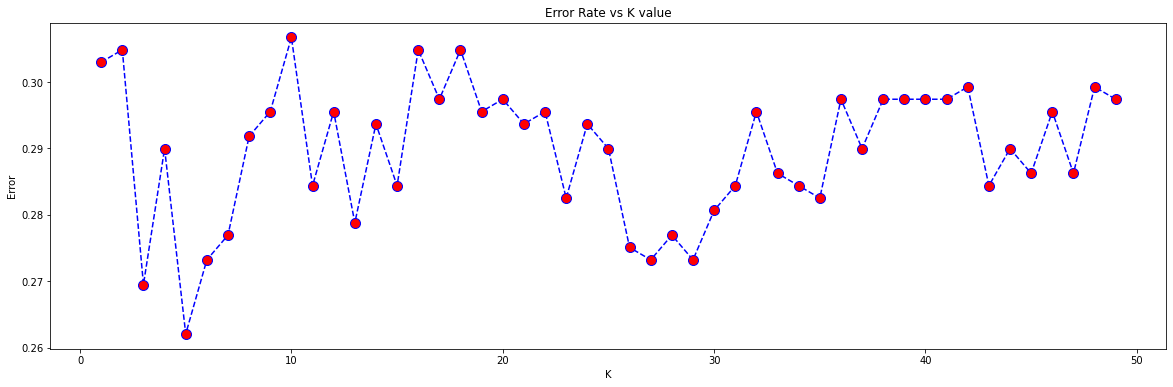

In [69]:
plt.figure(figsize=(20, 6))
plt.plot(range(1,50) ,error_rate, color = 'blue' , 
         linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error')

This is the graph of the varitations in the errors in the classificatiom with every unit change in the value of K. 

Here k is the independent variable and corresponding error is the dependent 
variable.

Inferences from the above plot:

Although the range of the error is very small(i.e from ~0.26 to ~0.35), it can be concluded that the error is minimum approximately between 0 to 10. 

Thus, the best results obtained are for k = 5.


In [66]:
  knn  = KNeighborsClassifier(n_neighbors= 5)
  knn.fit(X_train, y_train)
  pred  = knn.predict(X_test)
  print(" For  k = 5", " Confusion Matrix and Classification Report are")
  print(confusion_matrix(y_test, pred))
  print(classification_report(y_test, pred))

 For  k = 5  Confusion Matrix and Classification Report are
[[300  49]
 [ 92  97]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       349
           1       0.66      0.51      0.58       189

    accuracy                           0.74       538
   macro avg       0.71      0.69      0.69       538
weighted avg       0.73      0.74      0.73       538



Thus, in the above experiment we have performed KNN classification on the Diabetes dataset.
We first scaled the data before it was passed to the models.
Also depending on the data, the accuracy may be improved by checking the output for different values of k and the value for which the error is minimum must be considered.
  